In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data from CSV using the Pandas library
df = pd.read_csv('./crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,992.673282,18.026142,True,True,140,8.527341,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,147.998025,29.794042,False,False,106,1.127443,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,False,True,146,6.517573,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,730.379174,31.620687,True,True,110,7.248251,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [7]:
df_encoded['Fertilizer_Used'] = df['Fertilizer_Used'].map({True: 1.0 , False: 0.0})
df_encoded['Irrigation_Used'] = df['Irrigation_Used'].map({True: 1.0 , False: 0.0})
X = df_encoded.drop(columns=['Yield_tons_per_hectare'])
y = df_encoded[['Yield_tons_per_hectare']]

In [9]:
crops = ["Crop_Barley", "Crop_Cotton", "Crop_Maize", "Crop_Rice", "Crop_Soybean", "Crop_Wheat"]
cotton_df = df_encoded[df_encoded["Crop_Cotton"] == 1.0]
cotton_df = cotton_df.drop(crops, axis=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
cotton_X = cotton_df[['Rainfall_mm', 
        'Temperature_Celsius', 
        'Fertilizer_Used', 
        'Irrigation_Used', 
        'Days_to_Harvest',
        'Region_East',
        'Region_West',
        'Region_North',
        'Region_South',
        'Soil_Type_Clay',
        'Soil_Type_Sandy',
        'Soil_Type_Loam',
        'Soil_Type_Silt',
        'Soil_Type_Peaty',
        'Soil_Type_Chalky',
        'Weather_Condition_Cloudy',
        'Weather_Condition_Rainy',
        'Weather_Condition_Sunny',
         ]]
cotton_y = cotton_df[["Yield_tons_per_hectare"]]
cotton_X_train, cotton_X_test, cotton_y_train, cotton_y_test = train_test_split(cotton_X, cotton_y, test_size=0.25, random_state=3)
cotton_scaler = StandardScaler()
cotton_X_train = cotton_scaler.fit_transform(cotton_X_train)
cotton_X_test = cotton_scaler.transform(cotton_X_test)
cotton_linreg = LinearRegression()
cotton_linreg.fit(cotton_X_train, cotton_y_train)
print(cotton_linreg.intercept_)
print(cotton_linreg.coef_)
cotton_predict = cotton_linreg.predict(cotton_X_test)
cotton_mse = mean_squared_error(cotton_y_test, cotton_predict)
cotton_mae = mean_absolute_error(cotton_y_test, cotton_predict)
cotton_r2 = r2_score(cotton_y_test, cotton_predict)

print("Mean Squared Error:", cotton_mse)
print("Mean Absolute Error:", cotton_mae)
print("(Accuracy)R² Score:", round(cotton_r2*100),'%')

[4.65027813]
[[ 1.29703168e+00  1.46055569e-01  7.50432136e-01  5.99874442e-01
  -1.22428553e-03  4.54091736e+09  4.53517140e+09  4.53240877e+09
   4.53284542e+09  9.43173537e+10  9.45095158e+10  9.43028152e+10
   9.42646275e+10  9.44552195e+10  9.45547089e+10  8.31129943e+11
   8.31670804e+11  8.32253187e+11]]
Mean Squared Error: 0.2530867882225103
Mean Absolute Error: 0.4007738763564739
(Accuracy)R² Score: 91 %


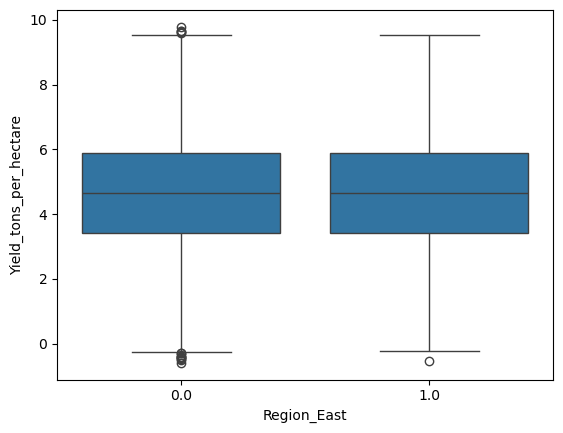

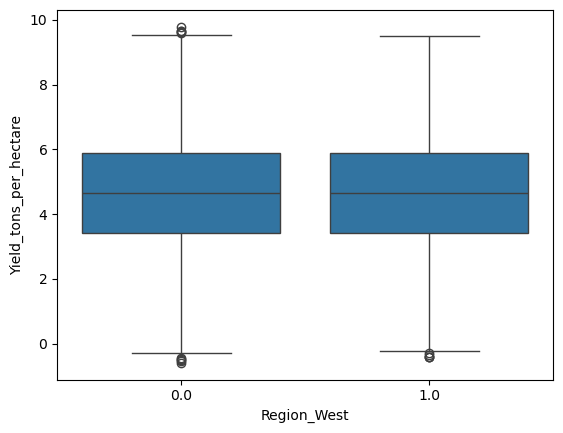

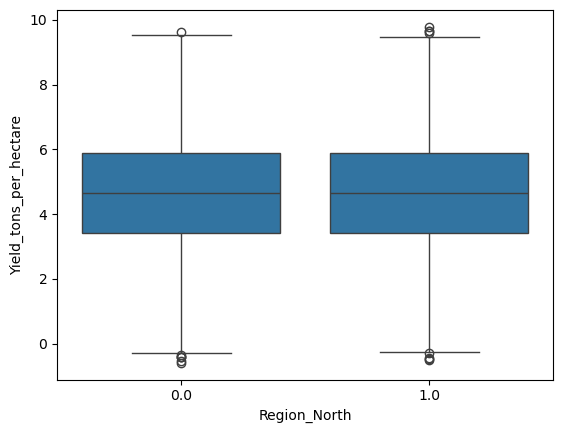

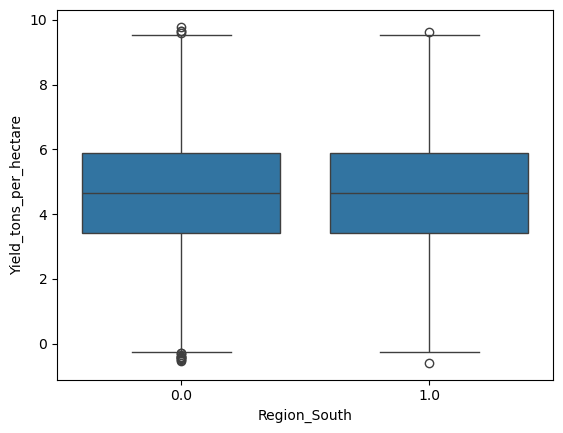

In [13]:
cotton_by_region = cotton_df[['Region_East','Region_West','Region_North','Region_South',"Yield_tons_per_hectare"]]
for column in ['Region_East','Region_West','Region_North','Region_South']:
    sns.boxplot(x=column,y="Yield_tons_per_hectare", data=cotton_by_region)
    plt.show()

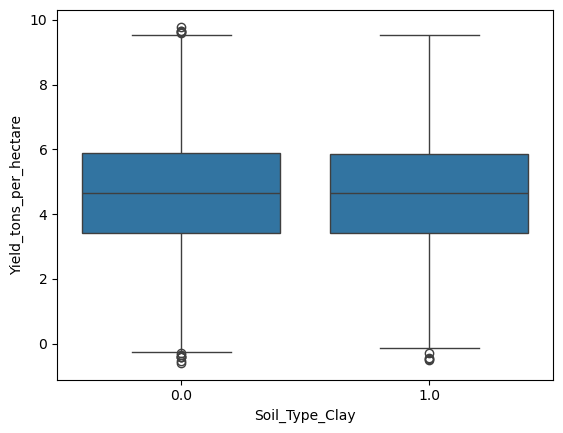

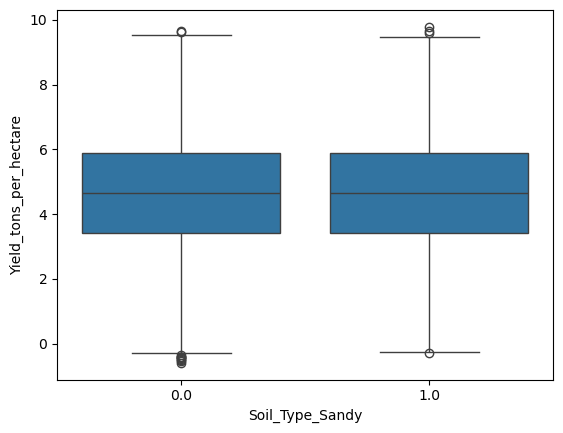

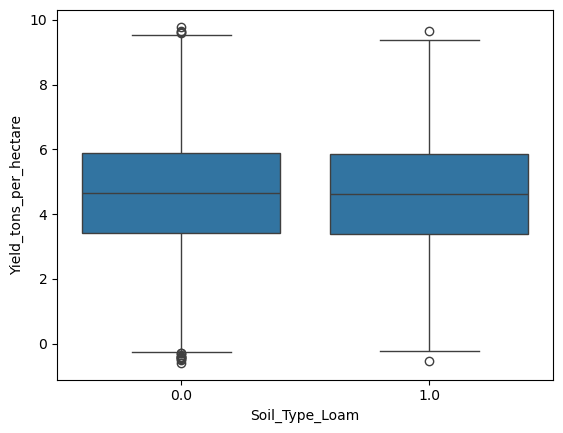

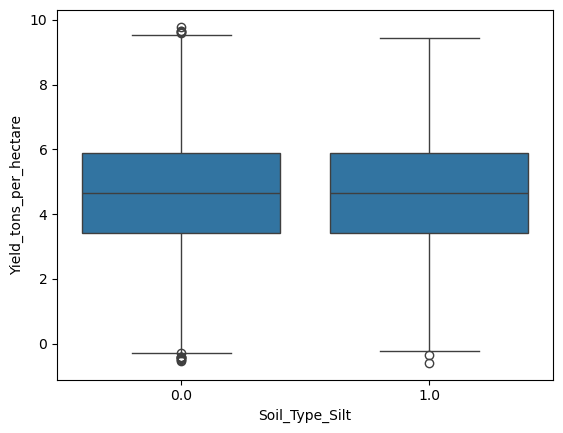

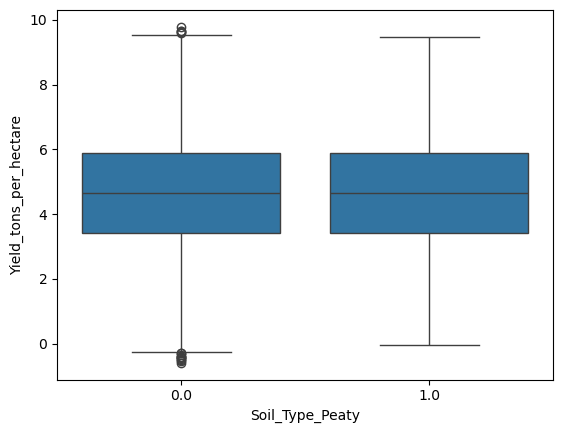

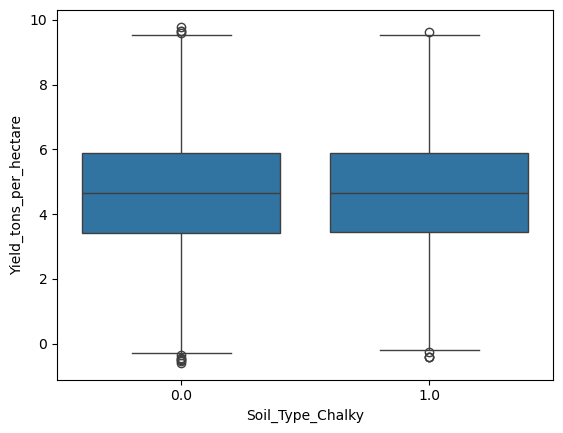

In [15]:
cotton_by_soil = cotton_df[['Soil_Type_Clay','Soil_Type_Sandy','Soil_Type_Loam','Soil_Type_Silt','Soil_Type_Peaty','Soil_Type_Chalky',"Yield_tons_per_hectare"]]
for column in ['Soil_Type_Clay','Soil_Type_Sandy','Soil_Type_Loam','Soil_Type_Silt','Soil_Type_Peaty','Soil_Type_Chalky']:
    sns.boxplot(x=column,y="Yield_tons_per_hectare", data=cotton_by_soil)
    plt.show()

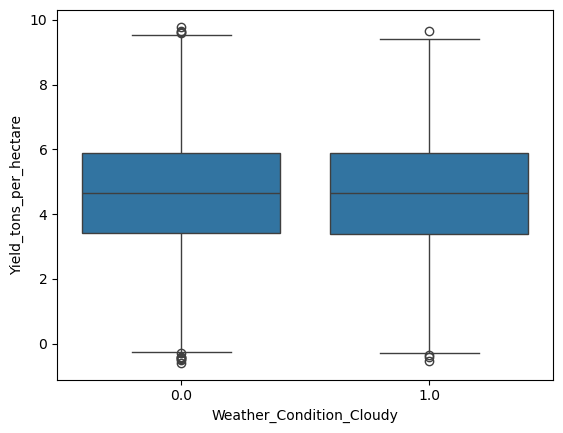

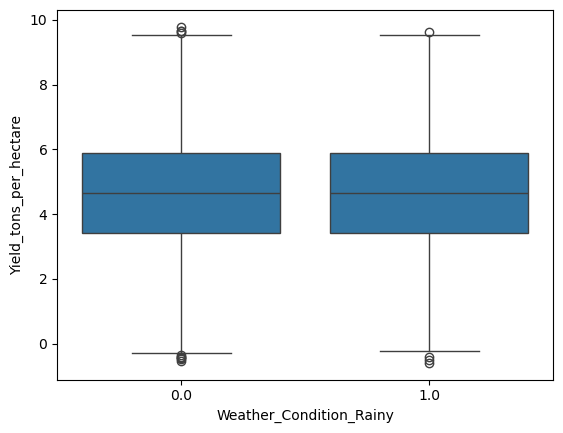

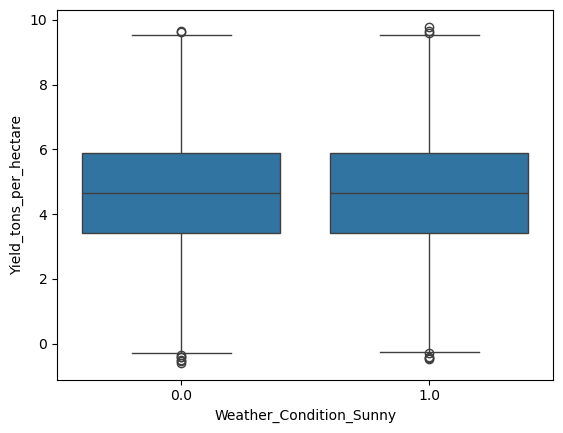

In [17]:
cotton_by_weather = cotton_df[['Weather_Condition_Cloudy','Weather_Condition_Rainy','Weather_Condition_Sunny',"Yield_tons_per_hectare"]]
for column in ['Weather_Condition_Cloudy','Weather_Condition_Rainy','Weather_Condition_Sunny']:
    sns.boxplot(x=column,y="Yield_tons_per_hectare", data=cotton_by_weather)
    plt.show()